# **Median Household Income and Access to Grocery Stores**

## Samantha Guerrero and Jessica Melendez

For our midterm we decided to see what correlation there was between median household income and access to grocery stores. We decided that we would pull data from census tracts as well as zip codes so we could begin comparing communities like West LA and South LA.

First let's import our libraries and data...

In [1]:
import pandas as pd

from io import StringIO

import geopandas as gpd

import contextily as ctx

import matplotlib.pyplot as plt

We'll be looking at median household income for now.

In [2]:
LA_income = gpd.read_file('data/censusincome.geojson')

Only 5 columns but a ton of data. Let's see what we can do

In [3]:
LA_income.shape

(2347, 5)

In [4]:
LA_income.head()

,geoid,name,B19013001,"B19013001, Error",geometry
0,05000US06037,"Los Angeles County, CA",68044.0,347.0,"MULTIPOLYGON (((-118.70339 34.16859, -118.7033..."
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",63534.0,16806.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",90389.0,9796.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",44083.0,9483.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",43713.0,4639.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."


In [5]:
LA_income.tail()

,geoid,name,B19013001,"B19013001, Error",geometry
2342,14000US06037980031,"Census Tract 9800.31, Los Angeles, CA",NaN,NaN,"MULTIPOLYGON (((-118.29105 33.75378, -118.2905..."
2343,14000US06037980033,"Census Tract 9800.33, Los Angeles, CA",NaN,NaN,"MULTIPOLYGON (((-118.24897 33.75590, -118.2470..."
2344,14000US06037990100,"Census Tract 9901, Los Angeles, CA",NaN,NaN,"MULTIPOLYGON (((-118.95114 33.99643, -118.9505..."
2345,14000US06037990200,"Census Tract 9902, Los Angeles, CA",NaN,NaN,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325..."
2346,14000US06037990300,"Census Tract 9903, Los Angeles, CA",NaN,NaN,"MULTIPOLYGON (((-118.47656 33.75038, -118.4661..."


In [6]:
LA_income.sample()

,geoid,name,B19013001,"B19013001, Error",geometry
1598,14000US06037533701,"Census Tract 5337.01, Los Angeles, CA",36845.0,6739.0,"MULTIPOLYGON (((-118.18556 33.98714, -118.1854..."


Okay, lets plot our data to get a sense of what area we're looking at

<AxesSubplot:>

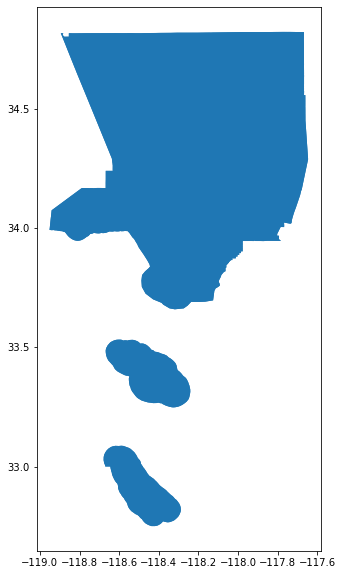

In [7]:
LA_income.plot(figsize=(10,10))

Yup! LA County, perfect! Now, let's drop our county row, labeled as 0. We don't want that skewing our data. 

In [8]:
LA_income.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2347 entries, 0 to 2346
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             2347 non-null   object  
 1   name              2347 non-null   object  
 2   B19013001         2311 non-null   float64 
 3   B19013001, Error  2307 non-null   float64 
 4   geometry          2347 non-null   geometry
dtypes: float64(2), geometry(1), object(2)
memory usage: 91.8+ KB


In [9]:
LA_income.geoid.head()

0          05000US06037
1    14000US06037101110
2    14000US06037101122
3    14000US06037101210
4    14000US06037101220
Name: geoid, dtype: object

In [10]:
LA_income = LA_income.drop([0])

In [11]:
LA_income.head()

,geoid,name,B19013001,"B19013001, Error",geometry
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",63534.0,16806.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",90389.0,9796.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",44083.0,9483.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",43713.0,4639.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
5,14000US06037101300,"Census Tract 1013, Los Angeles, CA",81776.0,11857.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


Great! Now let's rename these columns for clarity

In [12]:
list(LA_income)

['geoid', 'name', 'B19013001', 'B19013001, Error', 'geometry']

In [13]:
LA_income.columns = ['geoid',
 'Census Tract',
 'Median HH Income',
 'Inflation Adjusted',
 'geometry']


In [14]:
LA_income.head()

,geoid,Census Tract,Median HH Income,Inflation Adjusted,geometry
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",63534.0,16806.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",90389.0,9796.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",44083.0,9483.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",43713.0,4639.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
5,14000US06037101300,"Census Tract 1013, Los Angeles, CA",81776.0,11857.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


Let's see a random sample and get more familiar with the Median Household Income Column.

In [15]:
random_tract = LA_income.sample()
random_tract

,geoid,Census Tract,Median HH Income,Inflation Adjusted,geometry
2345,14000US06037990200,"Census Tract 9902, Los Angeles, CA",NaN,NaN,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325..."


In [16]:
random_tract.iloc[0]['Median HH Income']

nan

In [17]:
LA_income['Median HH Income'].head()

1    63534.0
2    90389.0
3    44083.0
4    43713.0
5    81776.0
Name: Median HH Income, dtype: float64

In [18]:
LA_income['Median HH Income'].mean()

73242.84415584416

In [19]:
LA_income['Median HH Income'].median()

66212.0

Since this is census data, let's assess what the numbers might tell us. What are the percentiles? What's the maximum median household income and what is the minimum? Is there a prominent gap between income levels?

In [20]:
LA_income['Median HH Income'].describe()

count      2310.000000
mean      73242.844156
std       34516.005733
min        9191.000000
25%       48191.000000
50%       66212.000000
75%       90403.250000
max      250001.000000
Name: Median HH Income, dtype: float64

It looks like the minimum household income in a census track is 9,191. (Interesting, I'd like to know what area that median household income level falls on.) While the maximum median household income in a census track is 250,001. Thats a huge gap! I definitely want to see where folks are making maximum 250,001. This can also help us when we bring in out grocery store data to help us visualize where more grocery stores are located. Is there a concentration in areas with lower income where it might be needed or in places of higher income levels, where people might be able to afford higher concentrations and more quality grocery stores.

<AxesSubplot:ylabel='Frequency'>

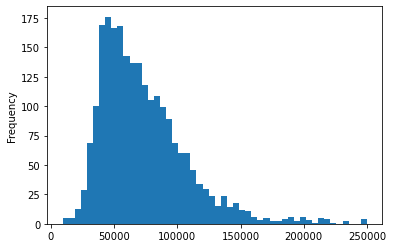

In [21]:
LA_income['Median HH Income'].plot.hist(bins=50)

By looking at the data, it seems like there's a high concentration of census tracts where people make around 50,000. Further, most census tracts' median household income ranges from around 50,000 to almost 100,000. 100,000 is where we begin to see a drop in census tracts that make that amount or close to that amount. The frequency continues to drop, less and less census tracts have identified people that make close to 200,000 and the outlier seems to be census tracts where the median household income is 250,000. 

In [22]:
LA_income_sorted = LA_income.sort_values(by='Median HH Income',ascending = False)

Let's keep our focus on median household income.

In [23]:
LA_income_sorted[['geoid','Median HH Income']].head(10)

,geoid,Median HH Income
2101,14000US06037670500,250001.0
341,14000US06037141700,250001.0
832,14000US06037262303,250001.0
833,14000US06037262400,250001.0
2120,14000US06037701201,234519.0
2332,14000US06037980019,231250.0
834,14000US06037262501,224962.0
840,14000US06037264000,220417.0
339,14000US06037141500,219698.0
828,14000US06037262100,217462.0


If we sort out the top median household income numbers we can begin visualizing the data below. Let's take a look...

<AxesSubplot:>

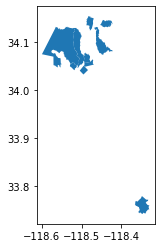

In [24]:
LA_income_sorted.head(10).plot()

okay, we're seeing something now. If we sort out the top 100 we can see more of a range. Let's take a look...

<AxesSubplot:>

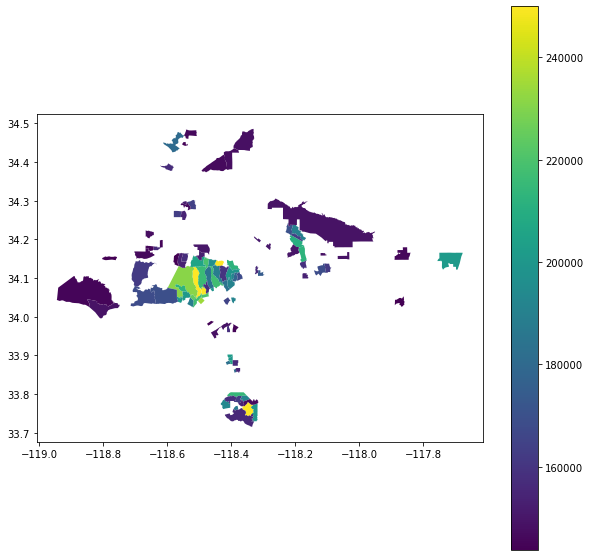

In [25]:
LA_income_sorted.head(100).plot(figsize=(10,10),column='Median HH Income',legend=True)

Let's continue sorting. How many census tracts have people making less than 50,000 where most of the concentration starts. 

In [26]:
list(LA_income)

['geoid', 'Census Tract', 'Median HH Income', 'Inflation Adjusted', 'geometry']

In [27]:
LA_income['Median HH Income'] < 50000

1       False
2       False
3        True
4        True
5       False
        ...  
2342    False
2343    False
2344    False
2345    False
2346    False
Name: Median HH Income, Length: 2346, dtype: bool

In [28]:
LA_income[LA_income['Median HH Income'] < 50000]

,geoid,Census Tract,Median HH Income,Inflation Adjusted,geometry
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",44083.0,9483.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",43713.0,4639.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
21,14000US06037104203,"Census Tract 1042.03, Los Angeles, CA",49609.0,11898.0,"MULTIPOLYGON (((-118.41799 34.27964, -118.4170..."
31,14000US06037104701,"Census Tract 1047.01, Los Angeles, CA",35357.0,6270.0,"MULTIPOLYGON (((-118.42190 34.26624, -118.4213..."
32,14000US06037104703,"Census Tract 1047.03, Los Angeles, CA",41875.0,14155.0,"MULTIPOLYGON (((-118.40909 34.25446, -118.4072..."
...,...,...,...,...,...
2228,14000US06037910502,"Census Tract 9105.02, Los Angeles, CA",38784.0,4570.0,"MULTIPOLYGON (((-118.10766 34.58734, -118.1061..."
2231,14000US06037910601,"Census Tract 9106.01, Los Angeles, CA",41563.0,10015.0,"MULTIPOLYGON (((-118.09427 34.58743, -118.0896..."
2232,14000US06037910602,"Census Tract 9106.02, Los Angeles, CA",41538.0,3615.0,"MULTIPOLYGON (((-118.09411 34.57975, -118.0937..."
2234,14000US06037910605,"Census Tract 9106.05, Los Angeles, CA",44665.0,10596.0,"MULTIPOLYGON (((-118.07620 34.56759, -118.0761..."


Now, let's see what the data looks like if we combine the data to sort out only census tracts with less than 50,000 median household income and census tracts with over 90,000 median household income.

In [29]:
LA_income[(LA_income['Median HH Income'] < 50000) | (LA_income['Median HH Income'] > 90000)]


,geoid,Census Tract,Median HH Income,Inflation Adjusted,geometry
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",90389.0,9796.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",44083.0,9483.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",43713.0,4639.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
10,14000US06037102107,"Census Tract 1021.07, Los Angeles, CA",109375.0,16677.0,"MULTIPOLYGON (((-118.36789 34.23939, -118.3678..."
11,14000US06037103101,"Census Tract 1031.01, Los Angeles, CA",99875.0,17773.0,"MULTIPOLYGON (((-118.31760 34.27387, -118.3175..."
...,...,...,...,...,...
2314,14000US06037920339,"Census Tract 9203.39, Los Angeles, CA",143047.0,42128.0,"MULTIPOLYGON (((-118.67620 34.40900, -118.6759..."
2315,14000US06037930101,"Census Tract 9301.01, Los Angeles, CA",149063.0,136896.0,"MULTIPOLYGON (((-118.28661 34.28156, -118.2865..."
2327,14000US06037980010,"Census Tract 9800.10, Los Angeles, CA",19167.0,11351.0,"MULTIPOLYGON (((-118.25165 34.08038, -118.2515..."
2332,14000US06037980019,"Census Tract 9800.19, Los Angeles, CA",231250.0,117385.0,"MULTIPOLYGON (((-118.59919 34.07436, -118.5991..."


Awesome! Now, let's try to plot this and create a chart.

<AxesSubplot:ylabel='Frequency'>

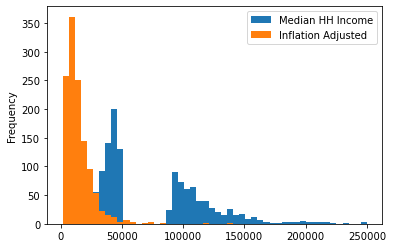

In [30]:
LA_income[(LA_income['Median HH Income'] < 50000) | (LA_income['Median HH Income'] > 90000)].plot.hist(bins=50)

Okay, the chart looks nice! I don't think this is what we intended to plot but this looks nice! What does it tell us? looks like the data is separated by median household income and inflation adjustments.

We'll come back to this part. Now, can we plot data for census tracts with less than 50,000 and those with more than 90,000?

AttributeError: 'GeoDataFrame' object has no attribute 'lower'

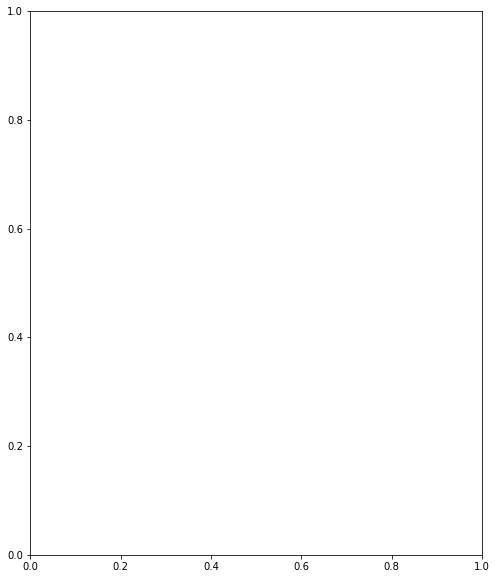

In [31]:
LA_income.plot(figsize=(12,10),
                 column='Median HH Income',
                 legend=True, 
                 scheme=LA_income[(LA_income['Median HH Income'] < 50000) | (LA_income['Median HH Income'])]
)

Oh no! That got messy. Let's try changing up the syntax for boolean values. Maybe that will help?

In [32]:
LA_income[(LA_income['Median HH Income']<=50000) & (LA_income['Median HH Income']>=90000)]


,geoid,Census Tract,Median HH Income,Inflation Adjusted,geometry


THAT DID NOT WORK! Let's change it back to our original boolean values

In [33]:
LA_income[(LA_income['Median HH Income']<=50000) | (LA_income['Median HH Income']>=90000)]


,geoid,Census Tract,Median HH Income,Inflation Adjusted,geometry
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",90389.0,9796.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",44083.0,9483.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",43713.0,4639.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
10,14000US06037102107,"Census Tract 1021.07, Los Angeles, CA",109375.0,16677.0,"MULTIPOLYGON (((-118.36789 34.23939, -118.3678..."
11,14000US06037103101,"Census Tract 1031.01, Los Angeles, CA",99875.0,17773.0,"MULTIPOLYGON (((-118.31760 34.27387, -118.3175..."
...,...,...,...,...,...
2314,14000US06037920339,"Census Tract 9203.39, Los Angeles, CA",143047.0,42128.0,"MULTIPOLYGON (((-118.67620 34.40900, -118.6759..."
2315,14000US06037930101,"Census Tract 9301.01, Los Angeles, CA",149063.0,136896.0,"MULTIPOLYGON (((-118.28661 34.28156, -118.2865..."
2327,14000US06037980010,"Census Tract 9800.10, Los Angeles, CA",19167.0,11351.0,"MULTIPOLYGON (((-118.25165 34.08038, -118.2515..."
2332,14000US06037980019,"Census Tract 9800.19, Los Angeles, CA",231250.0,117385.0,"MULTIPOLYGON (((-118.59919 34.07436, -118.5991..."


Cool! That worked! Let's try something different in order to plot these values. What if we create a new deo

In [34]:
LA50 = LA_income >50 (LA_income['Median HH Income']<=50000) | (LA_income['Median HH Income']>=90000)

<>:1: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
<>:1: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
/tmp/ipykernel_314/4113994282.py:1: SyntaxWarning: 'int' object is not callable; perhaps you missed a comma?
  LA50 = LA_income >50 (LA_income['Median HH Income']<=50000) | (LA_income['Median HH Income']>=90000)


TypeError: 'int' object is not callable